In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
# Upload the archive
df_cholesterol = pd.read_csv('./datasets/dataset_cholesterol.csv')

In [50]:
# Check info
df_cholesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [51]:
# Remove ID column
df_cholesterol.drop('Id', axis=1, inplace=True)

In [52]:
# Rename columns to remove spaces and make them lowercase
df_cholesterol.columns = [
    'blood_type',
    'smoker',
    'activity_level',
    'age',
    'weight',
    'height',
    'cholesterol'
]

In [53]:
# Copy DF to DF EDA
df_cholesterol_eda = df_cholesterol.copy()

In [54]:
# Copy DF to DF bucketing
df_cholesterol_bucketing = df_cholesterol.copy()

### EDA

In [55]:
# Visualize data
df_cholesterol_eda.head(10)

,blood_type,smoker,activity_level,age,weight,height,cholesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [56]:
df_cholesterol_eda.blood_type.unique()

array(['B', 'A', 'O', 'AB', nan], dtype=object)

In [57]:
# Detect missing values
df_cholesterol_eda.isnull().sum()

blood_type        4
smoker            3
activity_level    4
age               3
weight            3
height            3
cholesterol       0
dtype: int64

In [58]:
# Statistical summary of the data
df_cholesterol_eda.describe()

,age,weight,height,cholesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [59]:
# Colect categorical data
mode_blood_type = df_cholesterol_eda.blood_type.mode()
mode_smoker = df_cholesterol_eda.smoker.mode()
mode_activity_level = df_cholesterol_eda.activity_level.mode()

In [60]:
# Colect numerical data
median_age = df_cholesterol_eda.age.median()
median_weight = df_cholesterol_eda.weight.median()
median_height = df_cholesterol_eda.height.median()

In [61]:
# Input missing values
df_cholesterol_eda.fillna(value={
    'blood_type': mode_blood_type[0],
    'smoker': mode_smoker[0],
    'activity_level': mode_activity_level[0],
    'age': median_age,
    'weight': median_weight,
    'height': median_height
}, inplace=True)

In [62]:
# Convert age and weight to int
df_cholesterol_eda.age = df_cholesterol_eda.age.astype(int)
df_cholesterol_eda.height = df_cholesterol_eda.height.astype(int)

In [70]:
# Structure data
df_cholesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   blood_type      963 non-null    object 
 1   smoker          963 non-null    object 
 2   activity_level  963 non-null    object 
 3   age             963 non-null    int32  
 4   weight          963 non-null    float64
 5   height          963 non-null    int32  
 6   cholesterol     963 non-null    float64
dtypes: float64(2), int32(2), object(3)
memory usage: 52.7+ KB


In [64]:
# Visualize data
df_cholesterol_eda.head(10)

,blood_type,smoker,activity_level,age,weight,height,cholesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23
5,B,Não,Baixo,68,66.8,170,185.31
6,A,Sim,Baixo,60,117.3,181,289.33
7,O,Sim,Moderado,35,86.9,174,216.48
8,O,Não,Baixo,62,81.3,166,235.30
9,B,Sim,Alto,44,32.7,165,97.79


c:\Users\ranie\.virtualenvs\multiple_linear_regression-gn4KghFK\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='age'>

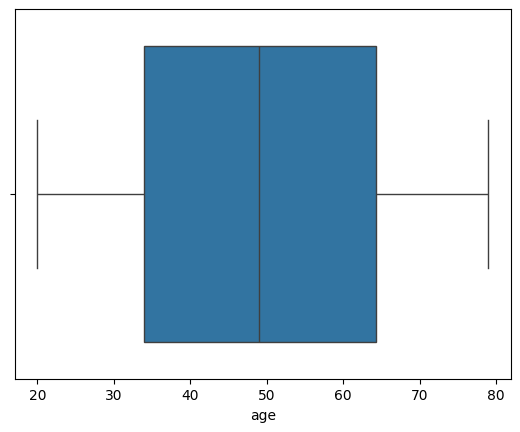

In [65]:
# Verify / detect outliers
sns.boxplot(data=df_cholesterol_eda, x='age')

c:\Users\ranie\.virtualenvs\multiple_linear_regression-gn4KghFK\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='weight'>

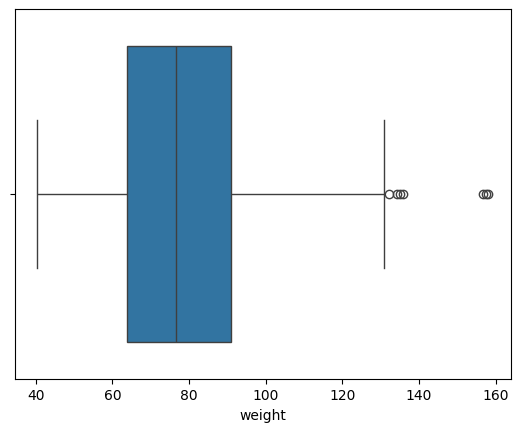

In [71]:
sns.boxplot(data=df_cholesterol_eda, x='weight')

In [67]:
# Filter public to remove outliers
df_cholesterol_eda[df_cholesterol_eda.weight < 40].count()

blood_type        37
smoker            37
activity_level    37
age               37
weight            37
height            37
cholesterol       37
dtype: int64

In [69]:
# Remove outliers
df_cholesterol_eda.drop(df_cholesterol_eda[df_cholesterol_eda.weight < 40].index, axis=0, inplace=True)


c:\Users\ranie\.virtualenvs\multiple_linear_regression-gn4KghFK\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='height'>

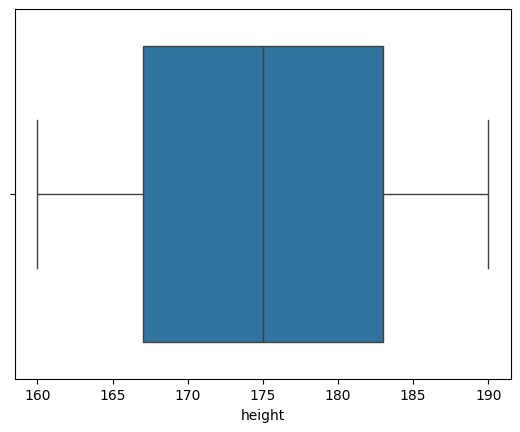

In [72]:
sns.boxplot(data=df_cholesterol_eda, x='height')

c:\Users\ranie\.virtualenvs\multiple_linear_regression-gn4KghFK\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='cholesterol'>

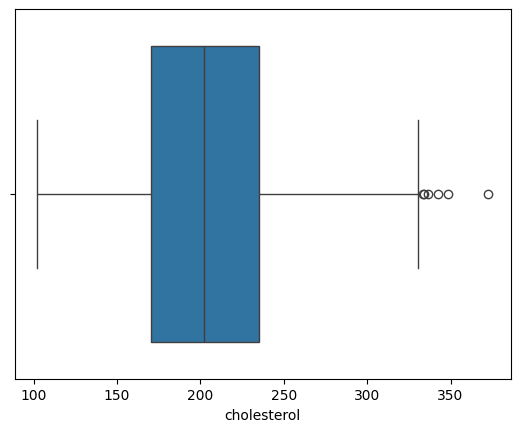

In [73]:
sns.boxplot(data=df_cholesterol_eda, x='cholesterol')